# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [1]:
# Import our libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, classification_report, roc_auc_score, precision_recall_curve, accuracy_score, precision_score, recall_score
from sklearn import tree

In [2]:
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [3]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Simple binary logistics regression

In [4]:



# Separate the target variable and features
x = df.drop(columns=['Bankrupt?'])  # Features
y = df['Bankrupt?']  # Target

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Preprocess the features by scaling them
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(x_test_scaled)

acc = (y_pred_logistic == y_test).mean()
print('\nAccuracy of test data = {:.3f}'.format(acc))





Accuracy of test data = 0.963


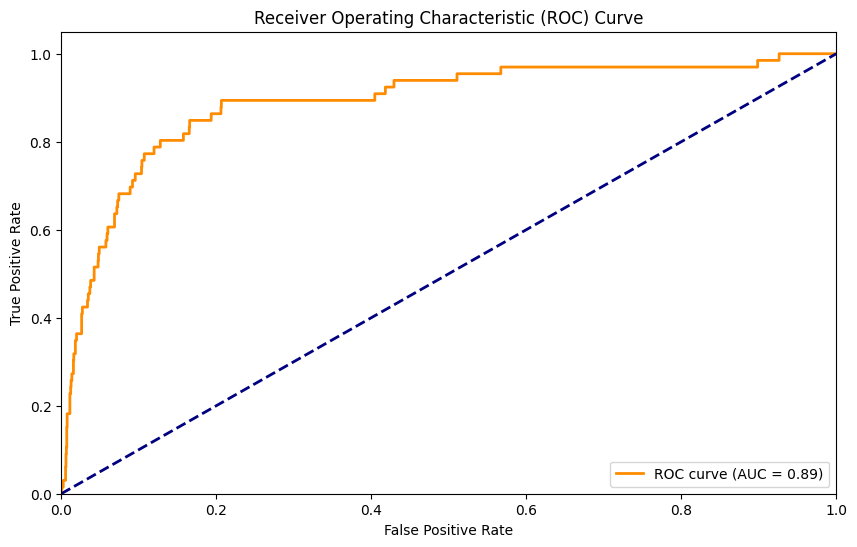

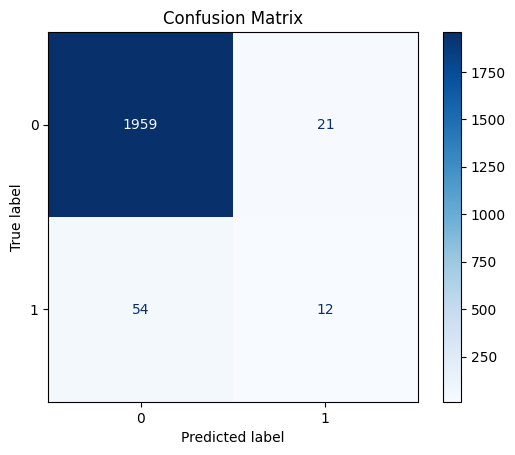

AUC Score: 0.889
F1 Score: 0.242

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.36      0.18      0.24        66

    accuracy                           0.96      2046
   macro avg       0.67      0.59      0.61      2046
weighted avg       0.95      0.96      0.96      2046



In [5]:
# Get prediction probabilities
y_pred_proba = logistic_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = logistic_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate F1 score
f1 = f1_score(y_test, y_pred_logistic)

# Print AUC score
print(f'AUC Score: {roc_auc:.3f}')
print(f'F1 Score: {f1:.3f}')

# Print Classification Report 
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

In [6]:
# Verify the shapes of X_test and y_test
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Compute probabilities for the positive class
y_scores = logistic_model.predict_proba(x_test)[:, 1]  # Probabilities for class 1

# Verify the shape of y_scores
print(f"y_scores shape: {y_scores.shape}")


x_test shape: (2046, 95)
y_test shape: (2046,)
y_scores shape: (2046,)


/Users/dariussiew/MY-DAC-Curriculum/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Random Forest

/Users/dariussiew/MY-DAC-Curriculum/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/var/folders/k_/d5lc6js96zzcd9j7cn5hkbr00000gn/T/ipykernel_40167/4153441699.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette="viridis")


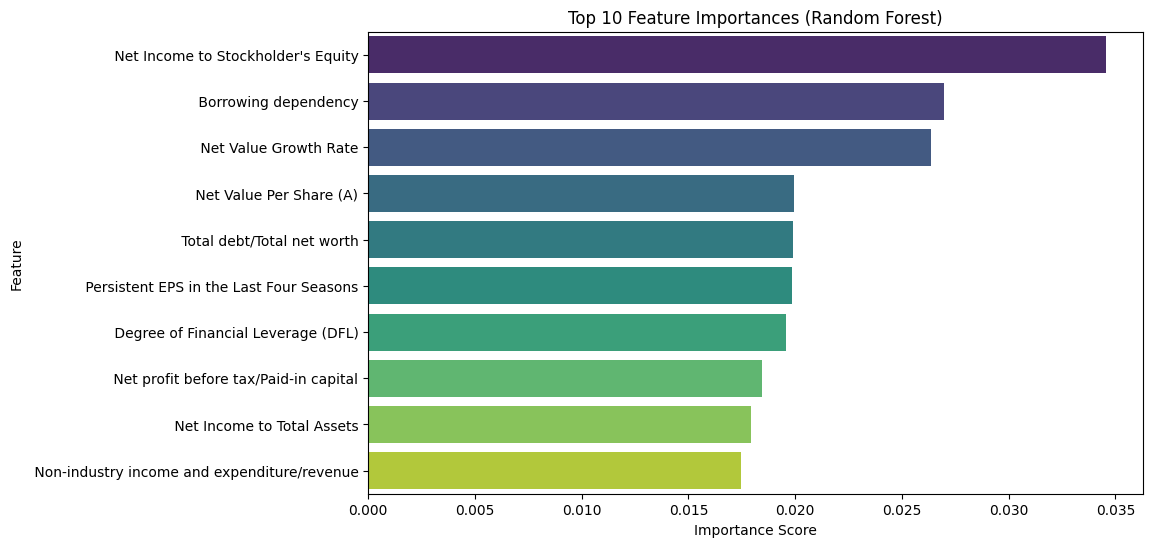

AUC Score: 0.8887


In [7]:

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_proba = rf_model.predict_proba(x_test_scaled)[:,1]

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Visualize feature importance
def plot_rf_feature_importance(model, feature_names):
    importances = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette="viridis")
    plt.title("Top 10 Feature Importances (Random Forest)")
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

# Generate Results and Plot
try:
    feature_names_rf = x.columns  # Original feature names
    plot_rf_feature_importance(rf_model, feature_names_rf)
except Exception as e:
    e

rf_accuracy, rf_classification_report, rf_conf_matrix

print(f"AUC Score: {roc_auc:.4f}")






In [8]:
print(rf_classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1980
           1       0.72      0.20      0.31        66

    accuracy                           0.97      2046
   macro avg       0.85      0.60      0.65      2046
weighted avg       0.97      0.97      0.96      2046



In [9]:
print(rf_conf_matrix)

[[1975    5]
 [  53   13]]


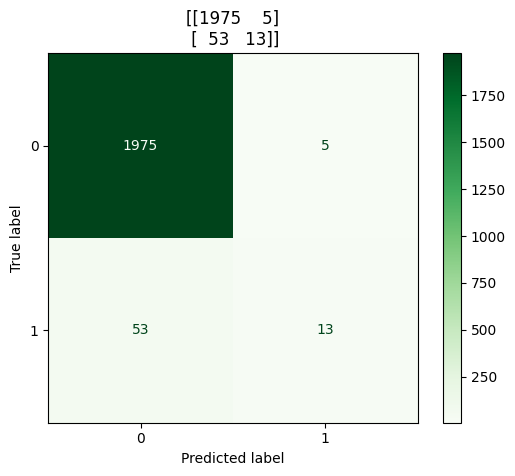

In [10]:
ConfusionMatrixDisplay(rf_conf_matrix).plot(cmap='Greens')
plt.title(rf_conf_matrix)
plt.show()

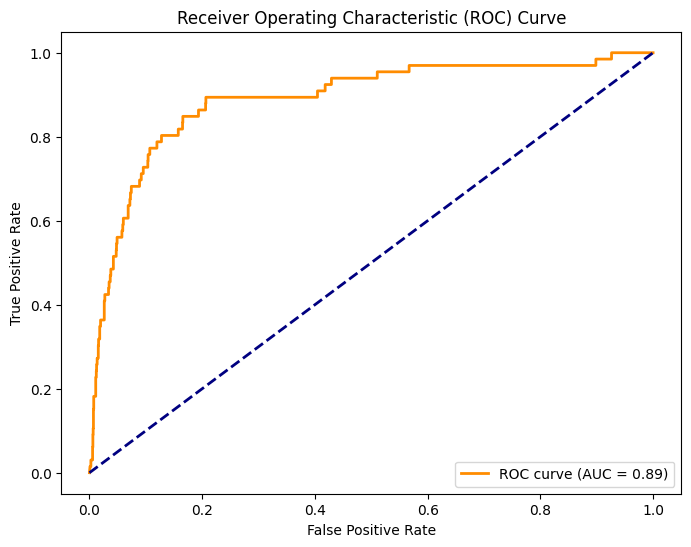

AUC Score: 0.8887


In [11]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

print(f"AUC Score: {roc_auc:.4f}")

In [13]:
# Logistic Regression Metrics
accuracy_lr = accuracy_score(y_test,y_pred_logistic)
auc_roc_lr = roc_auc_score(y_test, y_pred_proba)
precision_lr = precision_score(y_test, y_pred_logistic)
recall_lr = recall_score(y_test, y_pred_logistic)
f1_lr = f1_score(y_test, y_pred_logistic)


# Random Forest Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf_proba)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [accuracy_lr, auc_roc_lr, precision_lr, recall_lr, f1_lr],
    'Random Forest': [accuracy_rf, auc_roc_rf, precision_rf, recall_rf, f1_rf]
})

print(comparison_df)

      Metric  Logistic Regression  Random Forest
0   Accuracy             0.963343       0.971652
1    AUC-ROC             0.888736       0.688460
2  Precision             0.363636       0.722222
3     Recall             0.181818       0.196970
4   F1-Score             0.242424       0.309524
